In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
%matplotlib inline

In [28]:
pwd

'C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models\\Simple Regression Models'

In [29]:
df=pd.read_csv('C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models\\Sample.csv')
df.head(5)

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301


In [30]:
cdf=df[['CO2_EMISSIONS','FUEL_CONSUMPTION']]
cdf.head(9)

,CO2_EMISSIONS,FUEL_CONSUMPTION
0,191,9.3
1,191,8.9
2,265,13.7
3,267,13.8
4,301,15.0
5,232,11.4
6,221,10.6
7,223,10.8
8,311,15.5


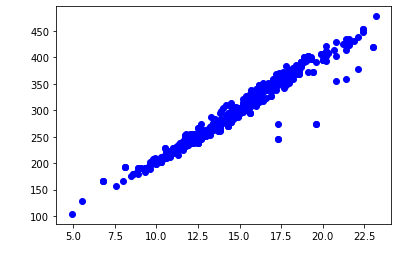

In [34]:
plt.scatter(cdf.FUEL_CONSUMPTION, cdf.CO2_EMISSIONS,color='blue')
plt.ylabel("CO2 Emissions",color='white',size=20)
plt.xlabel("Fuel Consumption",color='white',size=20)
plt.show()


In [33]:
msk=np.random.rand(len(df))<0.3
train=cdf[msk]
test=cdf[~msk]

In [36]:
from sklearn import linear_model
regr=linear_model.LinearRegression()

In [40]:
#training
train_x=np.asanyarray(train[['FUEL_CONSUMPTION']])
train_y=np.asanyarray(train[['CO2_EMISSIONS']])
regr.fit(train_x,train_y)
print("The Coefficient is : ",regr.coef_)
print("The intercept is : ",regr.intercept_)

The Coefficient is :  [[18.56769764]]
The intercept is :  [21.2623199]


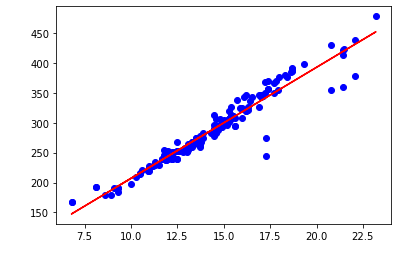

In [43]:
plt.scatter(train.FUEL_CONSUMPTION,train.CO2_EMISSIONS,color='blue')
plt.plot(train_x,train_x*regr.coef_[0][0]+regr.intercept_,color='red')
plt.xlabel("Fuel Consumption",color='white',size=20)
plt.ylabel("CO2 Emissions",color='white',size=20)
plt.show()

In [50]:
#testing the  model
test_x=np.asanyarray(test[['FUEL_CONSUMPTION']])
test_y=np.asanyarray(test[['CO2_EMISSIONS']])
test_y_hat=regr.predict(test_x)

In [56]:
#Evaluation
from sklearn.metrics import r2_score
print("The MAE: %.2f" %np.mean(np.absolute(test_y_hat-test_y)))
print("The MSE: %.2f" %np.mean((test_y_hat-test_y)**2))
print("The R2 Score is:",r2_score(test_y_hat,test_y))

The MAE: 8.69
The MSE: 178.71
The R2 Score is: 0.9443573649339957
